# Toydata Generation

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from toydata_generator import ToydataGenerator

## Tracks
We can use the following options:
+ **N** width of the (square) image
+ **max_tracks** will generate a random number of tracks in [1,max_tracks)
+ **max_kinks** will generate a random number of kinks in [0, max_kinks] for each track
+ **max_track_length** will generate a random length for each segment of track (between 2 kinks)
+ **classification** If True, the return blob will have informations specific for track/shower separation. Also, only one track xor one shower will be generated.
+ **seed** for Numpy random number generator
+ **kinks** to force the number of kinks to be exact, not random.

Here are two example images generated with tracks and kinks:

0 0 (172, 47) (127, 0)
0 0 (355, 206) (127, 127)
0 1 (127, 127) (0, 20)


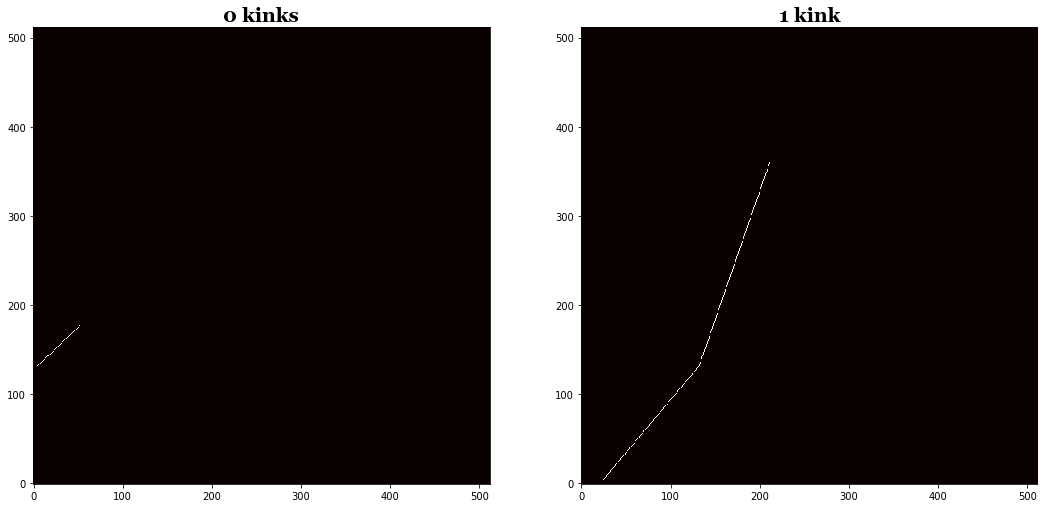

In [2]:
toydata0 = ToydataGenerator(N=512, max_tracks=1, max_kinks=3, max_track_length=300, classification=True, seed=0, kinks=0)
blob0 = toydata0.forward()

toydata1 = ToydataGenerator(N=512, max_tracks=1, max_kinks=3, max_track_length=300, classification=True, seed=5, kinks=1)
blob1 = toydata1.forward()

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18,12), facecolor='w')
ax0.imshow(blob0['data'][0,:,:,0], interpolation='none', cmap='hot', origin='lower')
ax0.set_title('0 kinks',fontsize=20,fontname='Georgia',fontweight='bold')
ax1.imshow(blob1['data'][0,:,:,0], interpolation='none', cmap='hot', origin='lower')
ax1.set_title('1 kink',fontsize=20,fontname='Georgia',fontweight='bold')
plt.show()

## Showers
Currently we cannot edit the shower configuration through `ToydataGenerator`. It has to be manually edited. Here are two examples of generated showers:

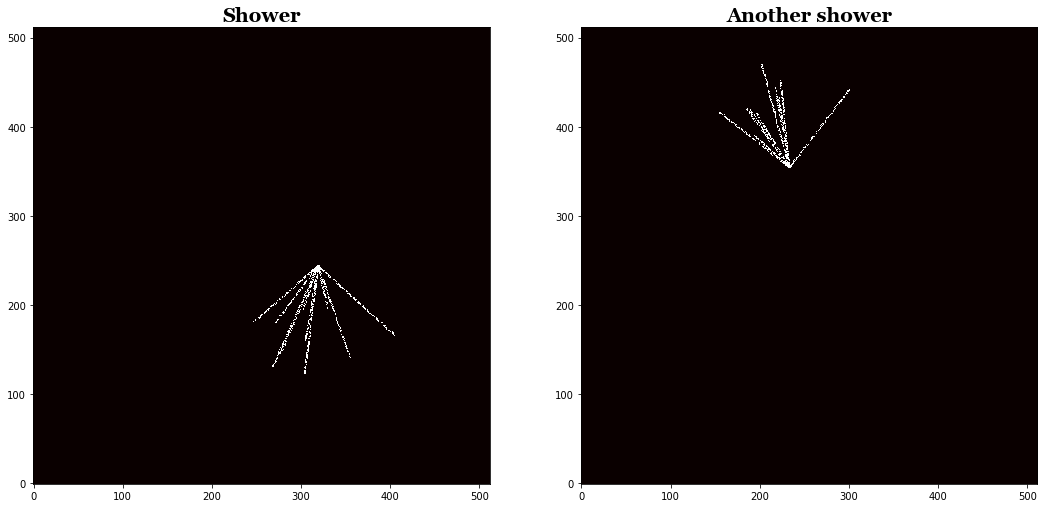

In [3]:
toydata0 = ToydataGenerator(N=512, max_tracks=1, max_kinks=1, classification=True, seed=0)
blob0 = toydata0.forward()

toydata1 = ToydataGenerator(N=512, max_tracks=1, max_kinks=1, classification=True, seed=6)
blob1 = toydata1.forward()

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18,12), facecolor='w')
ax0.imshow(blob0['data'][0,:,:,0], interpolation='none', cmap='hot', origin='lower')
ax0.set_title('Shower',fontsize=20,fontname='Georgia',fontweight='bold')
ax1.imshow(blob1['data'][0,:,:,0], interpolation='none', cmap='hot', origin='lower')
ax1.set_title('Another shower',fontsize=20,fontname='Georgia',fontweight='bold')
plt.show()

## Tracks and showers
Here is a sample with both tracks and showers on the same image.

0 0 (353, 34) (127, 0)
1 0 (275, 74) (127, 127)
2 0 (80, 453) (127, 127)
3 0 (34, 230) (0, 0)
0 0 (359, 143) (127, 127)
1 0 (373, 228) (127, 127)
2 0 (282, 182) (127, 127)
3 0 (258, 104) (127, 61)
4 0 (264, 372) (127, 127)
5 0 (365, 345) (127, 127)


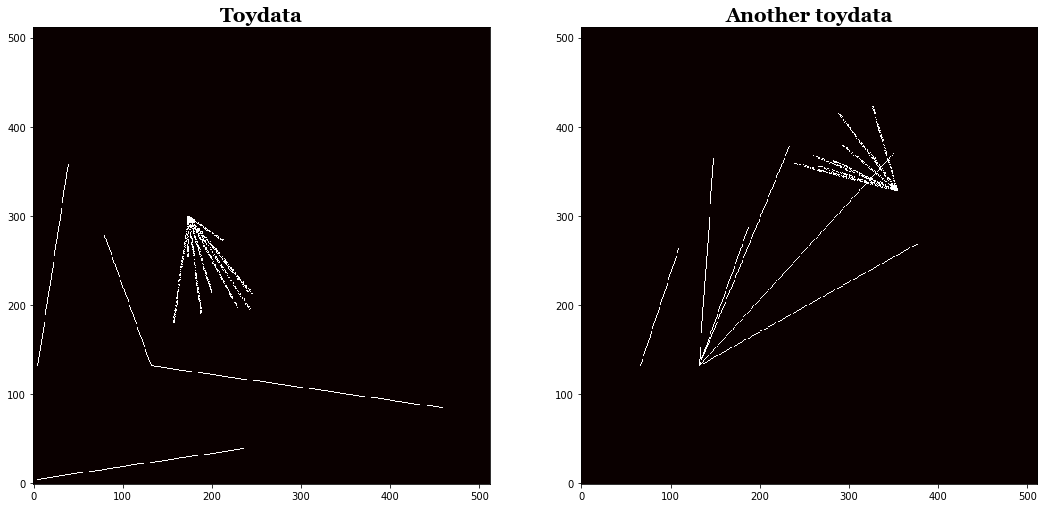

In [4]:
toydata0 = ToydataGenerator(N=512, max_tracks=7, max_kinks=1, seed=0)
blob0 = toydata0.forward()

toydata1 = ToydataGenerator(N=512, max_tracks=7, max_kinks=1, seed=6)
blob1 = toydata1.forward()

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18,12), facecolor='w')
ax0.imshow(blob0['data'][0,:,:,0], interpolation='none', cmap='hot', origin='lower')
ax0.set_title('Toydata',fontsize=20,fontname='Georgia',fontweight='bold')
ax1.imshow(blob1['data'][0,:,:,0], interpolation='none', cmap='hot', origin='lower')
ax1.set_title('Another toydata',fontsize=20,fontname='Georgia',fontweight='bold')
plt.show()

## Accuracy plots
Since this toydata generator is very simple, the track/shower separation based on this generated dataset has a very high accuracy. To run the training use `python track_shower_separation.py $LOG_DIR $OUTPUT_DIR train`.

Once the training is done (it is very quick, about 500 epochs are enough), use `python track_shower_separation.py  $OUTPUT_DIR/model-1000.ckpt inference` to run inference on 10 samples.

To get statistics run `python track_shower_separation.py $OUTPUT_DIR/model-1000.ckpt track-length` (for accuracy vs track length plot) or `python track_shower_separation.py $OUTPUT_DIR/model-1000.ckpt kink` (for accuracy vs number of kinks plot).

In [5]:
accuracy = np.genfromtxt("faster-particles/accuracy_track_length.csv", delimiter=",")
track_lengths = np.genfromtxt("faster-particles/track_lengths.csv", delimiter=",")
plt.hist2d(accuracy, track_lengths)

OSError: faster-particles/accuracy_track_length.csv not found.

In [ ]:
accuracy2 = np.genfromtxt("faster-particles/accuracy_kinks.csv", delimiter=",")
accuracy2_std = np.genfromtxt("faster-particles/accuracy_kinks_error.csv", delimiter=",")
kinks = np.genfromtxt("faster-particles/kinks.csv", delimiter=",")
plt.xlabel("#kinks")
plt.ylabel("Accuracy mean over 1000 samples")
plt.errorbar(kinks, accuracy2, yerr=accuracy2_std)


In [ ]:
kinks

In [ ]:
accuracy2

In [ ]:
accuracy2_std